# CCLAMP Network: Centrality Measures

In [1]:
# Import packages
import pandas as pd
import networkx as nx
from pyvis.network import Network
import community.community_louvain as community_louvain

In [2]:
# Read the network
network = pd.read_csv("CCLAMP_Directed_Network.txt", sep="\t", encoding='utf-8')
network.head(10)

,Target,Source,Weight,Author,DOB
0,Henri Bruning,Henk Kuitenbrouwer,12,Henri Bruning,10 juli 1900
1,Albert Kuyle,Henk Kuitenbrouwer,37,Albert Kuyle,17 februari 1904
2,Albe,Henk Kuitenbrouwer,25,Albe,8 juni 1902
3,Dirk Coster,Henk Kuitenbrouwer,11,Dirk Coster,7 juli 1887
4,Dirk Coster,Jan Engelman,13,Dirk Coster,7 juli 1887
5,Erich Wichman,Jan Engelman,6,Erich Wichman,11 augustus 1890
6,Willem Pijper,Jan Engelman,5,Willem Pijper,8 september 1894
7,Albe,Jan Engelman,27,Albe,8 juni 1902
8,Henri Bruning,Jan Engelman,6,Henri Bruning,10 juli 1900
9,Just Havelaar,Jan Engelman,5,Just Havelaar,12 februari 1880


In [3]:
# Create a weighted graph
G = nx.from_pandas_edgelist(network, 
                            source = 'Source', 
                            target = 'Target', 
                            edge_attr = 'Weight',
                            create_using = nx.DiGraph())
print(G)

DiGraph with 1629 nodes and 7247 edges


In [4]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)
      
# setting up node attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('CCLAMP.html')

CCLAMP.html


# Make Centrality Measures

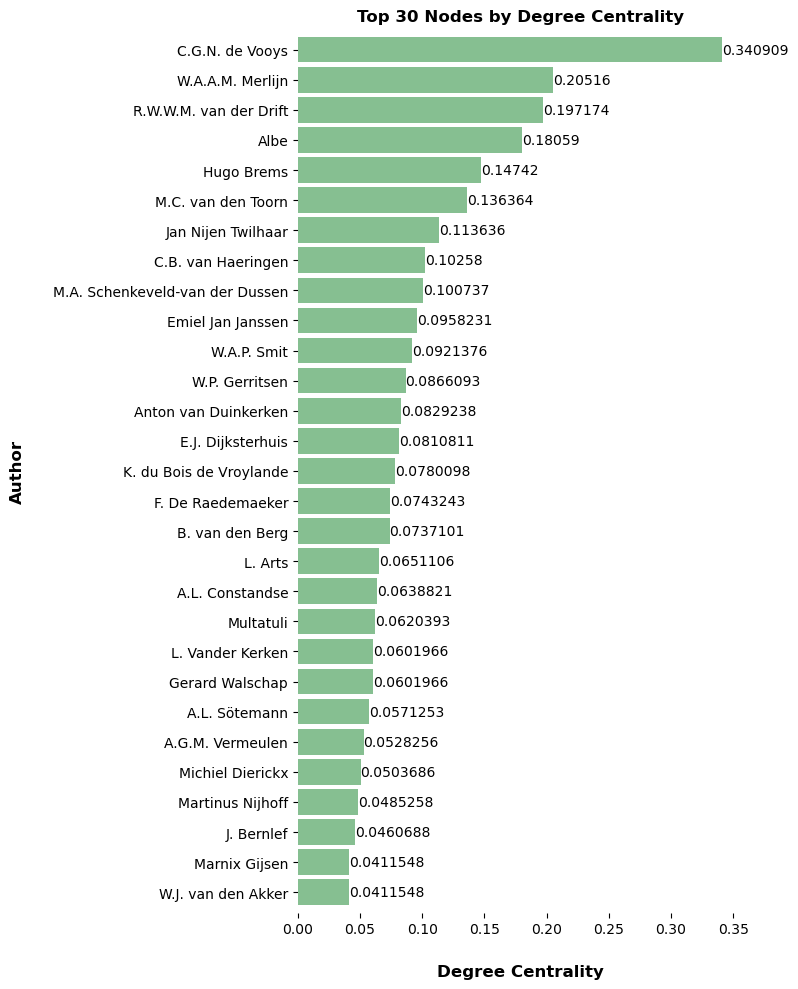

In [8]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
x = degree_df.sort_values('centrality', ascending=False)[0:29]

ax = x.plot(kind="barh", figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Labels and title
ax.set_xlabel("Degree Centrality", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Author", labelpad=20, weight='bold', size=12)
ax.set_title("Top 30 Nodes by Degree Centrality", size=12, weight='bold')

ax.invert_yaxis()  # Reverse the y-axis
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.tight_layout()  # Adjust layout
ax.legend().set_visible(False)

plt.show()

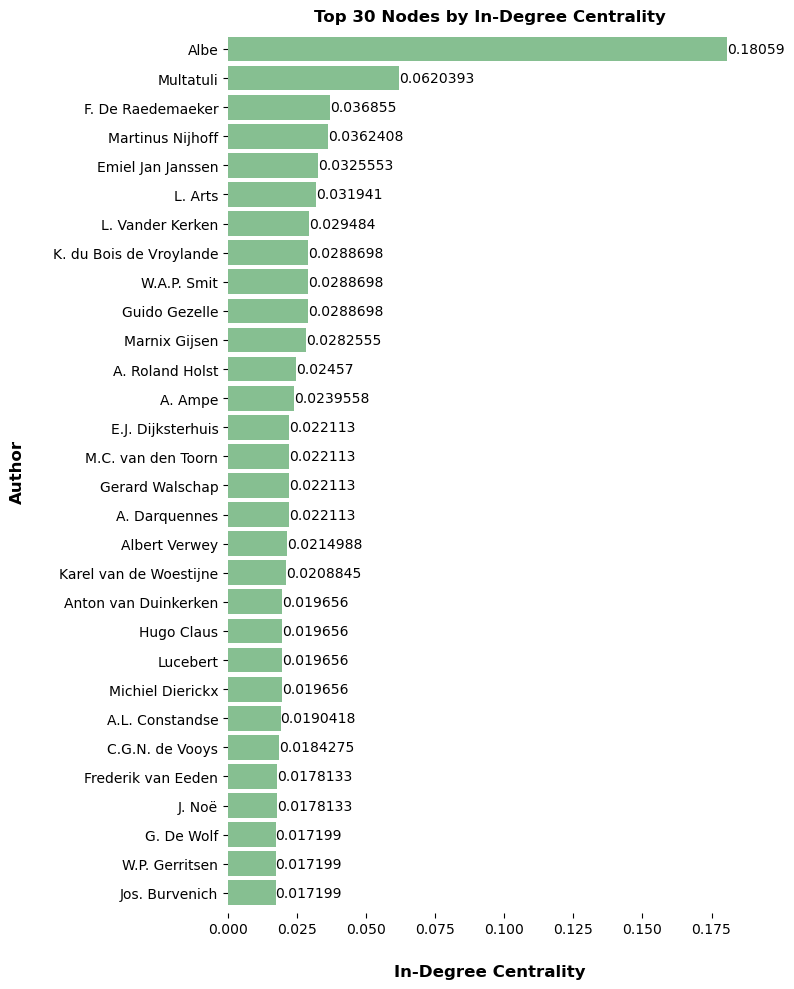

In [9]:
# In-Degree Centrality Calculation
in_degree_dict = nx.in_degree_centrality(G)
in_degree_df = pd.DataFrame.from_dict(in_degree_dict, orient='index', columns=['centrality'])
top_in_degree_nodes = in_degree_df.sort_values('centrality', ascending=False).head(30)

import matplotlib.pyplot as plt

# Plot Top 30 Nodes by In-Degree Centrality
ax = top_in_degree_nodes.plot(kind="barh", figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Labels and Title
ax.set_xlabel("In-Degree Centrality", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Author", labelpad=20, weight='bold', size=12)
ax.set_title("Top 30 Nodes by In-Degree Centrality", size=12, weight='bold')

ax.invert_yaxis()  # Reverse the y-axis
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.tight_layout()  # Adjust layout
ax.legend().set_visible(False)

plt.show()

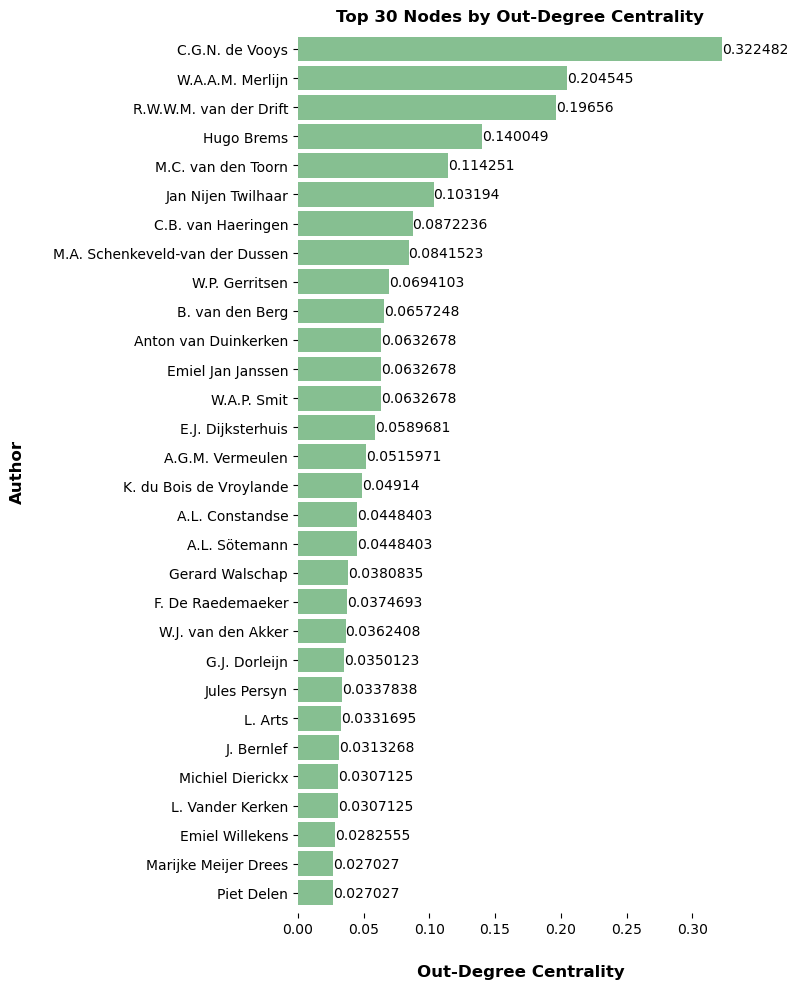

In [10]:
# Out-Degree Centrality Calculation
out_degree_dict = nx.out_degree_centrality(G)
out_degree_df = pd.DataFrame.from_dict(out_degree_dict, orient='index', columns=['centrality'])
top_out_degree_nodes = out_degree_df.sort_values('centrality', ascending=False).head(30)

import matplotlib.pyplot as plt

# Plot Top 30 Nodes by Out-Degree Centrality
ax = top_out_degree_nodes.plot(kind="barh", figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Labels and Title
ax.set_xlabel("Out-Degree Centrality", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Author", labelpad=20, weight='bold', size=12)
ax.set_title("Top 30 Nodes by Out-Degree Centrality", size=12, weight='bold')

ax.invert_yaxis()  # Reverse the y-axis
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.tight_layout()  # Adjust layout
ax.legend().set_visible(False)

plt.show()

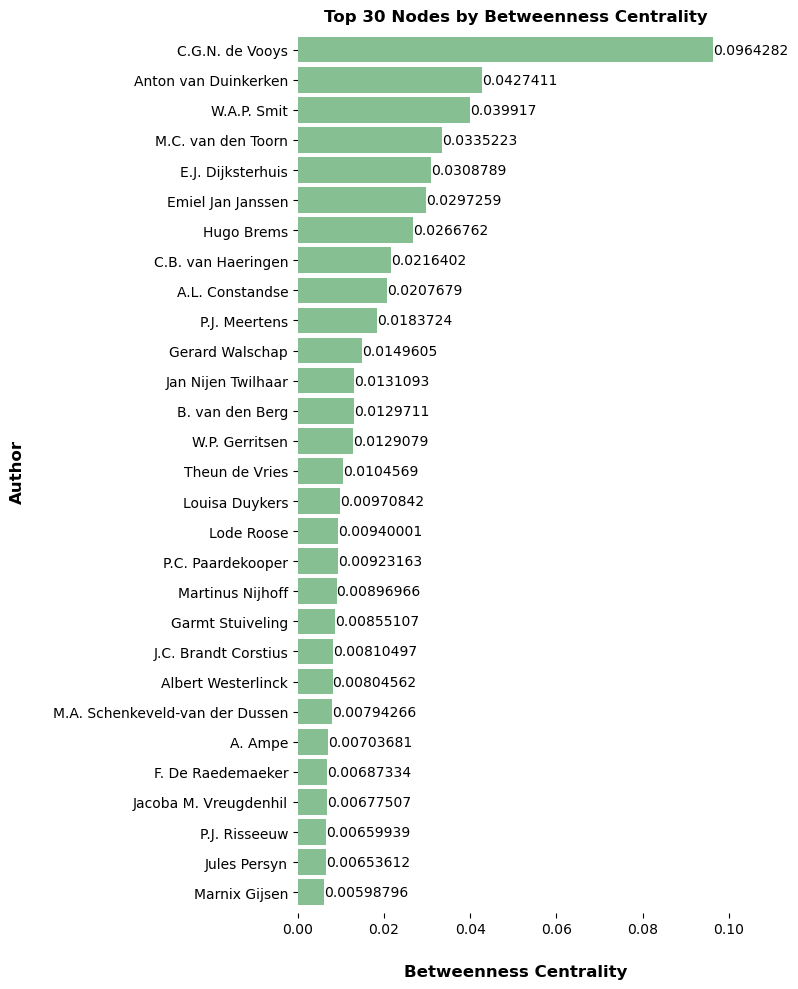

In [7]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
x = betweenness_df.sort_values('centrality', ascending=False)[0:29]

ax = x.plot(kind="barh", figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Labels and title
ax.set_xlabel("Betweenness Centrality", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Author", labelpad=20, weight='bold', size=12)
ax.set_title("Top 30 Nodes by Betweenness Centrality", size=12, weight='bold')

ax.invert_yaxis()  # Reverse the y-axis
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.tight_layout()  # Adjust layout
ax.legend().set_visible(False)

plt.show()

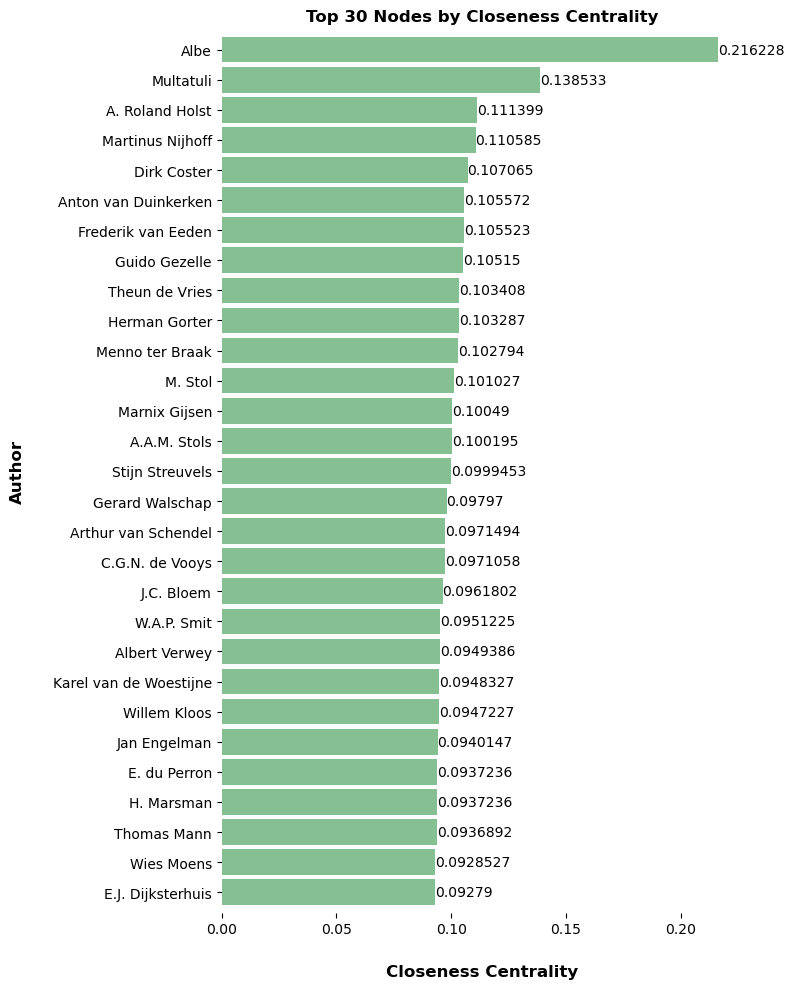

In [6]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
x = closeness_df.sort_values('centrality', ascending=False)[0:29]

ax = x.plot(kind="barh", figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Labels and title
ax.set_xlabel("Closeness Centrality", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Author", labelpad=20, weight='bold', size=12)
ax.set_title("Top 30 Nodes by Closeness Centrality", size=12, weight='bold')

ax.invert_yaxis()  # Reverse the y-axis
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.tight_layout()  # Adjust layout
ax.legend().set_visible(False)

plt.show()

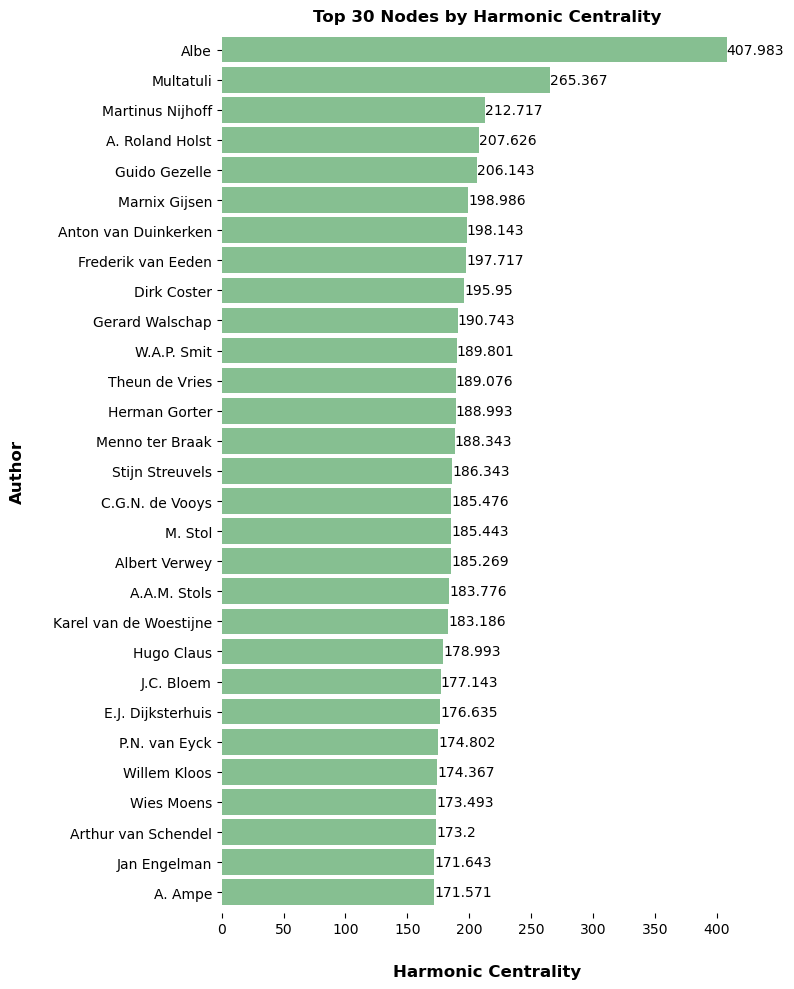

In [4]:
import matplotlib.pyplot as plt

# Harmonic centrality
harmonic_dict = nx.harmonic_centrality(G)
harmonic_df = pd.DataFrame.from_dict(harmonic_dict, orient='index', columns=['Harmonic centrality'])

# Plot top 30 nodes
x = harmonic_df.sort_values('Harmonic centrality', ascending=False)[0:29]

ax = x.plot(kind="barh", figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Labels and title
ax.set_xlabel("Harmonic Centrality", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Author", labelpad=20, weight='bold', size=12)
ax.set_title("Top 30 Nodes by Harmonic Centrality", size=12, weight='bold')

ax.invert_yaxis()  # Reverse the y-axis
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.tight_layout()  # Adjust layout
ax.legend().set_visible(False)

plt.show()


In [13]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')
nx.set_node_attributes(G, harmonic_dict, 'harmonic_centrality')

In [14]:
harmonic_df = pd.DataFrame.from_dict(harmonic_dict, orient='index')
harmonic_df.head(10)

,0
A. Moerdijk,2.000000
Maria Viola,144.102381
Piet Calis,0.000000
G.A. Nauta,127.096429
P. Spigt,108.740873
G.F. Haspels,127.096429
J. Weisgerber,0.000000
Eugène van Itterbeek,87.443651
D. van Blom,152.442857
Jan Elzo Niemeijer,90.913889


In [ ]:
harmonic_df.to_csv("CCLAMP_Network_Harmonic_Centrality.txt", index=True, sep='\t', encoding='utf-8')